## Exercice 1: les fonctions témoins

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# from numpy import linalg.norm
from scipy.optimize import minimize_scalar as minimize_scalar

x = np.array([1,1])

def f(x):
    return (x[0]-1)**2 + 10*(x[0]**2-x[1])**2

def g(x):
    return x[0]**2+2*x[1]**2+2*x[0]*x[1]

In [1]:
def df(x):
    return np.array([2*(x[0]-1)+10*2*2*x[0]*(x[0]**2-x[1]**2), -10*2*(x[0]**2-x[1])])

In [2]:
def dg(x):
    return np.array([2*x[0]+2*x[1],2*2*x[1]+2*x[0]])

# def d2f(x):
#     return np.array()

## Exercie 2: descente du gradient à pas fixe

93

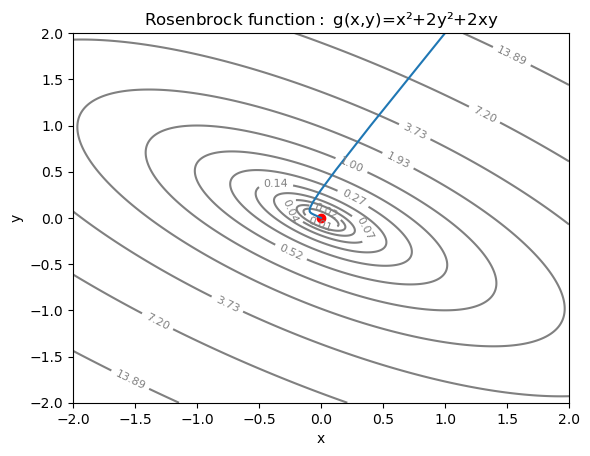

In [4]:
def descente_fixe(f,df,x0,h,tol):
    x  = x0
    count =0
    T = np.array([x])
    while (np.linalg.norm(df(x)) > tol and count < 1000):
        count += 1
        x = x - h*df(x)
        T = np.append(T,[x], axis=0)
    return count,T 

nb_iterations, T = descente_fixe(g,dg,[1,2],0.1,0.0001)

X = np.linspace(-2,2,500)
Y = np.linspace(-2,2,500)
XX,YY = np.meshgrid(X,Y)
ZZ = g(np.array([XX,YY]))
contour = plt.contour(XX,YY,ZZ,
                     levels= np.logspace(-2,2,15, base=10), colors= 'grey')

plt.clabel(contour, inline=True, fontsize=8) 
plt.title("---")
plt.xlabel('x')                      
plt.ylabel('y')
plt.title(r'$\mathrm{Rosenbrock \ function: }$ g(x,y)=x²+2y²+2xy')
plt.scatter(0,0,c='r')
plt.plot(T[:,0],T[:,1])                      
                      
nb_iterations

array([[ 1.    ,  2.    ],
       [ 0.4   ,  1.    ],
       [ 0.12  ,  0.52  ],
       [-0.008 ,  0.288 ],
       [-0.064 ,  0.1744]])

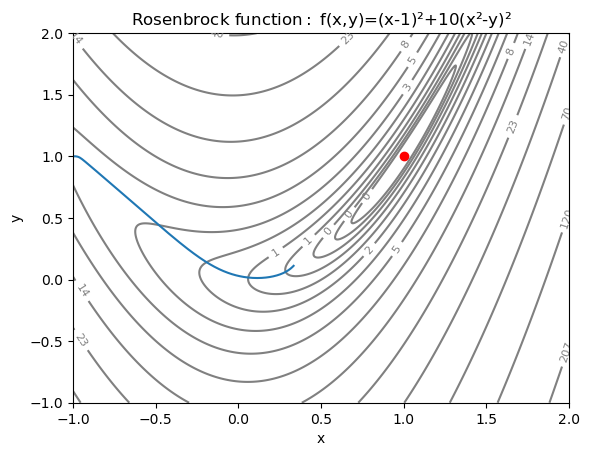

In [6]:
nb_iterations,T1 = descente_fixe(f,df,np.array([-1,1]),0.004,0.01)

X = np.linspace(-1,2,500)
Y = np.linspace(-1,2,500)
XX,YY = np.meshgrid(X,Y)
ZZ = f(np.array([XX,YY]))
contour = plt.contour(XX,YY,ZZ,
                     levels= np.logspace(-1,3.5,20, base=10), colors= 'grey')

plt.clabel(contour, inline=True, fontsize=8) 
plt.title(r'$\mathrm{Rosenbrock \ function: }$ f(x,y)=(x-1)²+10(x²-y)²')
plt.xlabel('x')                      
plt.ylabel('y')
plt.scatter(1,1,c='r')
plt.plot(T1[:,0],T1[:,1])                      
 
nb_iterations 
T[0:5]

## Exercice 3: descente de gradient à pas optimal

In [19]:
def descente_pas_optimal(f,df,x0,tol):
    x  = x0
    count = 0
    T = np.array([x])
    while (np.linalg.norm(df(x)) >= tol and count < 1000):
        
        def h(t):
            return f(x - t*df(x))
        
        count += 1
        h_opt= minimize_scalar(h).x
        x = x - h_opt*df(x)
        T = np.append(T,[x], axis=0)
    return count,T 

29

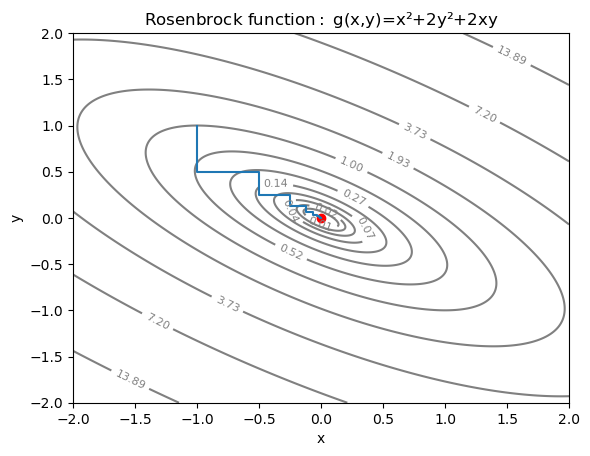

In [23]:
nb_iterations, T = descente_pas_optimal(g,dg,[-1,1],0.0001)

X = np.linspace(-2,2,500)
Y = np.linspace(-2,2,500)
XX,YY = np.meshgrid(X,Y)
ZZ = g(np.array([XX,YY]))
contour = plt.contour(XX,YY,ZZ,
                     levels= np.logspace(-2,2,15, base=10), colors= 'grey')

plt.clabel(contour, inline=True, fontsize=8) 
plt.title("---")
plt.xlabel('x')                      
plt.ylabel('y')
plt.title(r'$\mathrm{Rosenbrock \ function: }$ g(x,y)=x²+2y²+2xy')
plt.scatter(0,0,c='r')
plt.plot(T[:,0],T[:,1])                      
                      
nb_iterations
#T[0:5]

## Exercice 4: Fletcher-Wolfe

In [34]:
# regle de Wolfe
def wolfe(f, df,dk,x,L=10,c1=0.1,c2=0.9):
    #dk = - df(x)
    m = 0
    M = np.inf
    t=0.1
    
    while (f(x+t*dk) > f(x)+c1*t*df(x)@dk) or (df(x+t*dk)@dk < c2*df(x)@dk):
        if (f(x+t*dk) > f(x)+c1*t*df(x)@dk):
            M=t
            t = (m+M)/2
        elif ( df(x+t*dk)@dk < c2*df(x)@dk ):
            m = t
            if (M == np.inf) :
                t = 10*t
            else:
                t = (m+M)/2            
    return t

def descente_wolfe(f, df, x0, tol, L=10,c1=0.1,c2=0.9):
    x  = x0
    dk = - df(x)
    count = 0
    T = np.array([x])
    while (np.linalg.norm(df(x)) >= tol and count < 1000):
        count += 1
        t = wolfe(f, df,dk,x,L=10,c1=0.1,c2=0.9)
        x = x - t*df(x)
        T = np.append(T,[x], axis=0)
    return count,T

    

1000

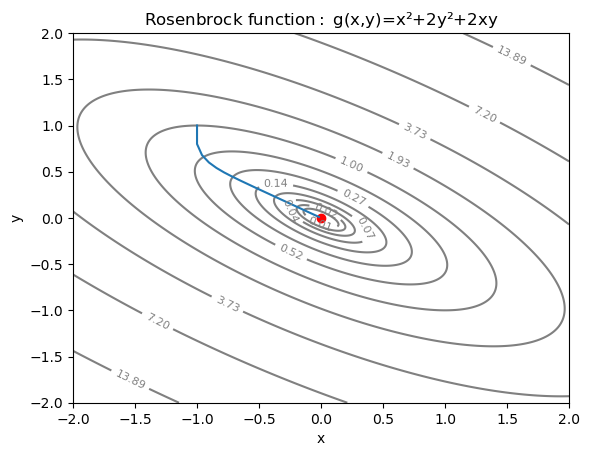

In [35]:
nb_iterations, T = descente_wolfe(g,dg,[-1,1],0.0001)

X = np.linspace(-2,2,500)
Y = np.linspace(-2,2,500)
XX,YY = np.meshgrid(X,Y)
ZZ = g(np.array([XX,YY]))
contour = plt.contour(XX,YY,ZZ,
                     levels= np.logspace(-2,2,15, base=10), colors= 'grey')

plt.clabel(contour, inline=True, fontsize=8) 
plt.title("---")
plt.xlabel('x')                      
plt.ylabel('y')
plt.title(r'$\mathrm{Rosenbrock \ function: }$ g(x,y)=x²+2y²+2xy')
plt.scatter(0,0,c='r')
plt.plot(T[:,0],T[:,1])                      
                      
nb_iterations